In [39]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [41]:
#Load the dataset
path = "/content/drive/MyDrive/oasis/Advertising.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


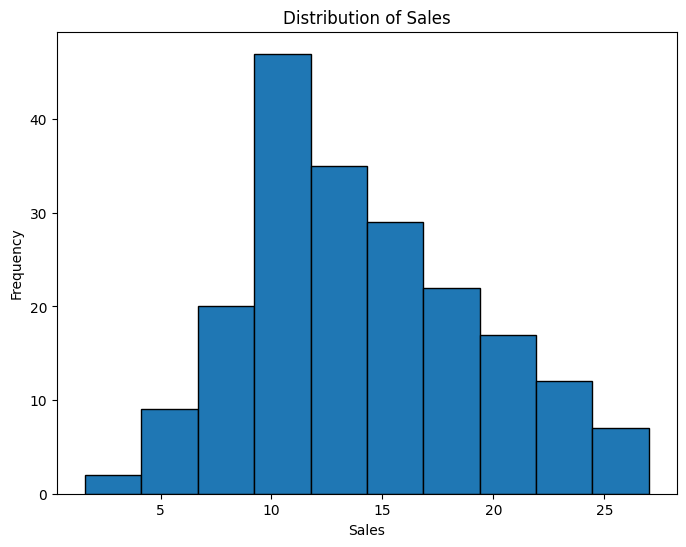

In [42]:
#Distribution of Sales

import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=10, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Sales')

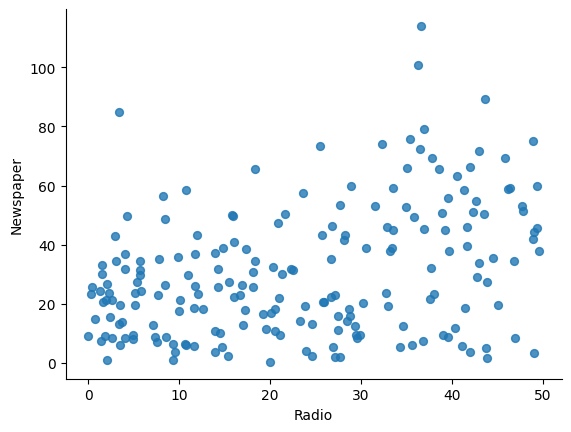

In [43]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [46]:
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


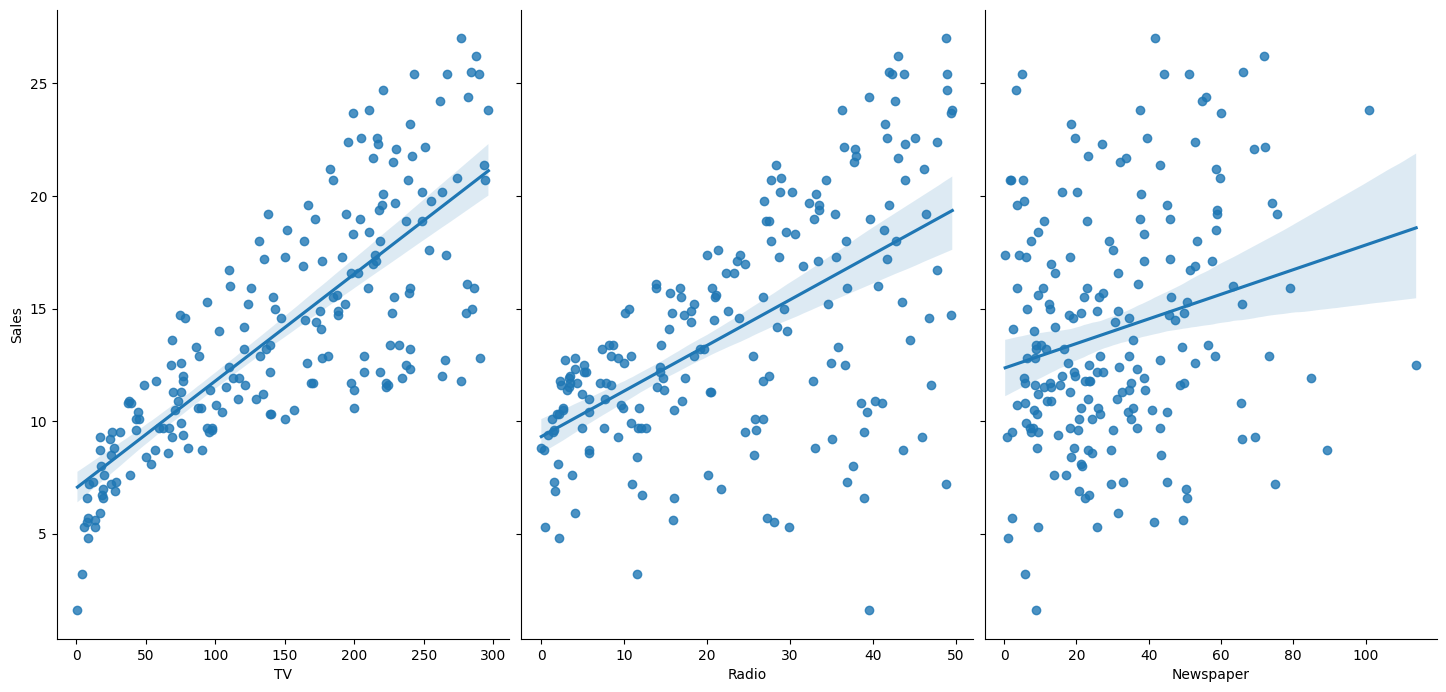

In [47]:
# Visualize the data
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
plt.show()

In [61]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [49]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [51]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [52]:
# Print model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


In [53]:
#Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [54]:
#Evaluate the model
y_pred = model.predict(X_test)

In [55]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 3.1740973539761033
Root Mean Squared Error (RMSE): 1.78159966153345
Mean Absolute Error (MAE): 1.4607567168117603
R2 Score: 0.899438024100912


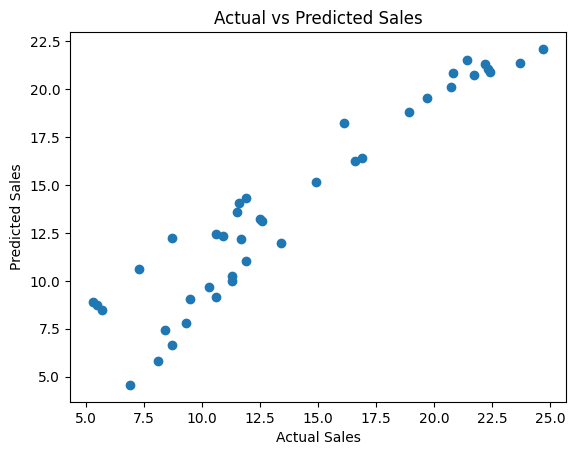

In [56]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

<ipython-input-57-7e2984a7e94f>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


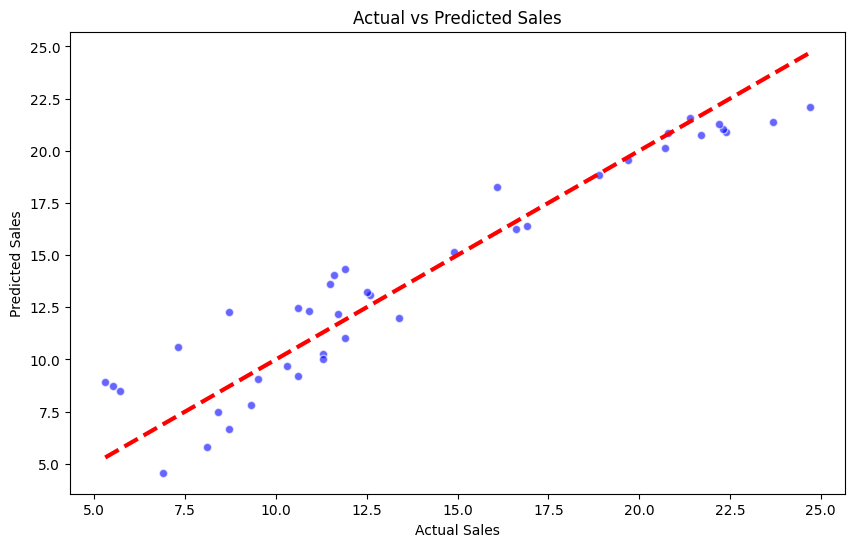

In [57]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='w', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

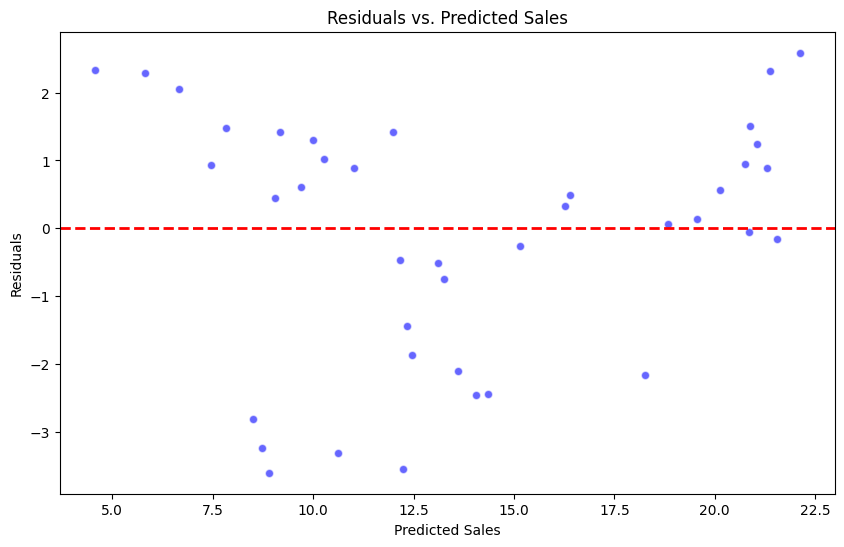

In [58]:
# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w', color='blue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sales')
plt.show()

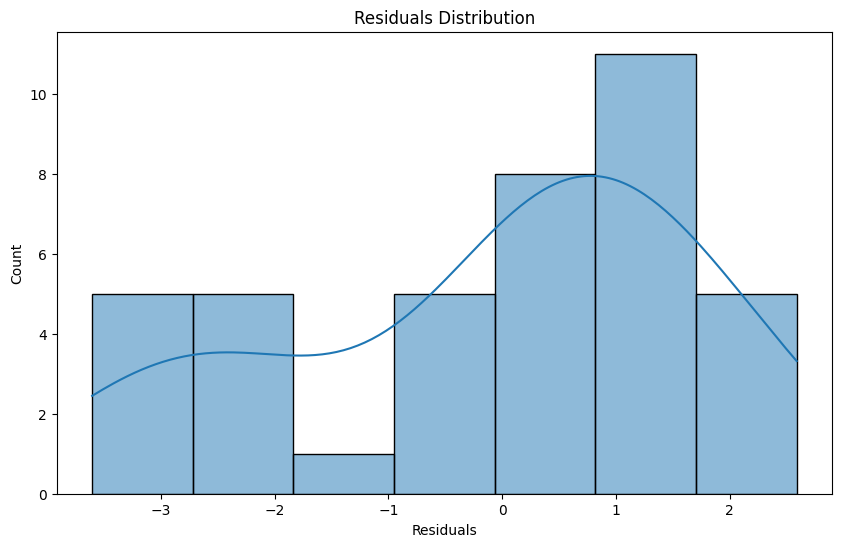

In [59]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [63]:
def predict_sales(tv, radio, newspaper):
    prediction = model.predict([[tv, radio, newspaper]])
    return prediction[0]

# Test with new data
example_data = [
    {'TV': 150, 'Radio': 25, 'Newspaper': 15},

]

for data in example_data:
    predicted_sales = predict_sales(data['TV'], data['Radio'], data['Newspaper'])
    print(f"For TV: {data['TV']}, Radio: {data['Radio']}, Newspaper: {data['Newspaper']}")
    print(f'Predicted Sales: {predicted_sales:.2f}')

For TV: 150, Radio: 25, Newspaper: 15
Predicted Sales: 14.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
